Importing libraries

In [27]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

Training

In [2]:
train_dir = "train"
test_dir = "test"

In [3]:
img_size = 48

In [4]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [6]:
model = tf.keras.Sequential([

        # input layer
        tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(48,48,1)),
        tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu' ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        # 1st hidden dense layer
        tf.keras.layers.Conv2D(128,(5,5), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        # 2nd hidden dense layer
        tf.keras.layers.Conv2D(512,(3,3), padding='same', activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        # 3rd hidden dense layer
        tf.keras.layers.Conv2D(512,(3,3), padding='same', activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        # Flatten layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        # output layer
        tf.keras.layers.Dense(7, activation='softmax')
    ])

In [7]:
optimiser = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 128)       2

In [8]:
history = model.fit(x = train_generator,epochs = 25,validation_data = validation_generator,batch_size=64)

Epoch 1/25
359/359 [==============================] - 371s 1s/step - loss: 5.4162 - accuracy: 0.2313 - val_loss: 3.5061 - val_accuracy: 0.2388
Epoch 2/25
359/359 [==============================] - 371s 1s/step - loss: 2.5840 - accuracy: 0.3415 - val_loss: 2.7459 - val_accuracy: 0.3149
Epoch 3/25
359/359 [==============================] - 360s 1s/step - loss: 2.4560 - accuracy: 0.4220 - val_loss: 2.5791 - val_accuracy: 0.3869
Epoch 4/25
359/359 [==============================] - 369s 1s/step - loss: 2.2638 - accuracy: 0.4763 - val_loss: 2.1844 - val_accuracy: 0.5014
Epoch 5/25
359/359 [==============================] - 356s 990ms/step - loss: 2.2585 - accuracy: 0.4838 - val_loss: 2.1396 - val_accuracy: 0.5021
Epoch 6/25
359/359 [==============================] - 342s 954ms/step - loss: 2.1780 - accuracy: 0.4973 - val_loss: 2.1162 - val_accuracy: 0.5321
Epoch 7/25
359/359 [==============================] - 342s 952ms/step - loss: 2.1850 - accuracy: 0.5036 - val_loss: 2.0957 - val_accurac

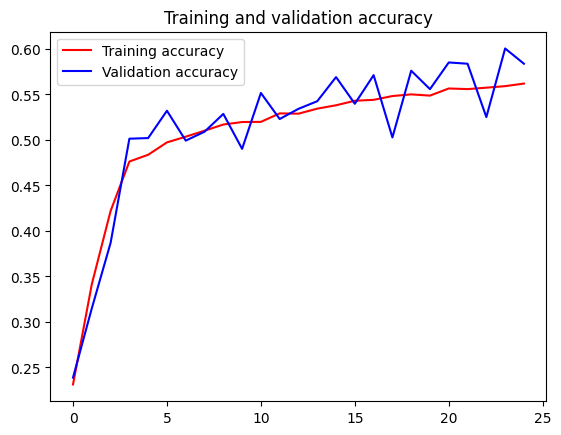

<Figure size 640x480 with 0 Axes>

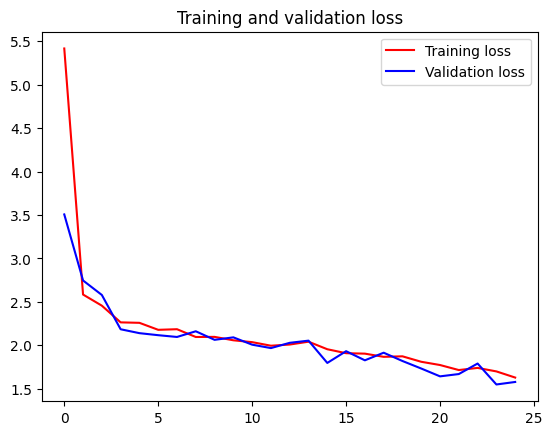

In [9]:
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()

In [10]:
model.save('model_fer2013.h5')

In [11]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 3s 147ms/step - loss: 1.5778 - accuracy: 0.5838
final train accuracy = 56.50 , validation accuracy = 58.38


(48, 48)


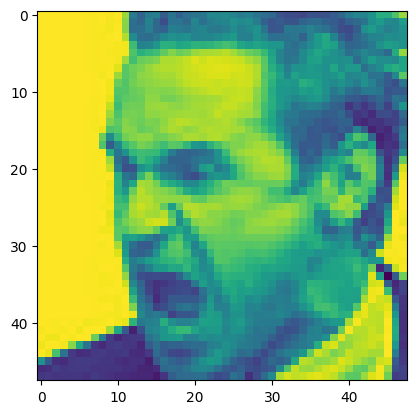

In [16]:
img = image.load_img("test/angry/PrivateTest_8892314.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

In [17]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [18]:
img = np.expand_dims(img,axis = 0)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

1/1 [==============================] - 1s 1s/step
[0.7253812, 0.0, 0.27461877, 0.0, 0.0, 0.0, 0.0]


In [23]:
img_index = result.index(max(result))
b = label_dict[img_index]
print(b)
plt.show()

Angry


In [20]:
model.save_weights('model_weights.h5')

In [26]:
from IPython.display import Audio
from IPython.core.display import display
song_path = 'angry.mp3'
song = os.path.join(song_path,b)
print(f'Playing {b} song')
def beep():
    display(Audio(song_path, autoplay=True))
beep()

Playing Angry song
